In [5]:
import numpy as np
import matplotlib.pyplot as plt
try:
    from sklearn.datasets.samples_generator import make_blobs
except:
    from sklearn.datasets import make_blobs
import itertools
%matplotlib inline

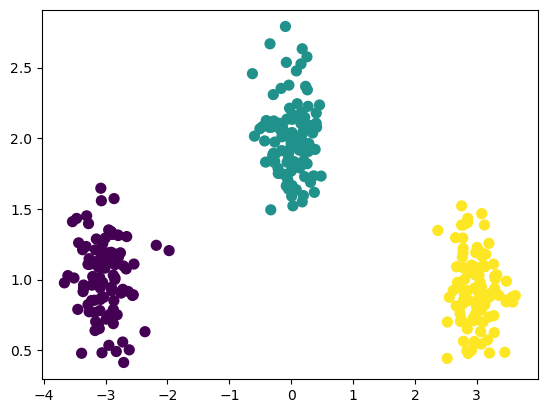

In [22]:
# Create the  training data
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

# One VS All

In [7]:
classes=set(y)

def fit_single_classifier(X, y_i):
    pass
estimators=[0]*len(set(y))
for target_class in set(y):
    y_prime=(y==target_class).astype("int")
    svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200)
    svm_estimator.fit(X,y_prime)
    estimators[target_class]=svm_estimator
# for i in range(3) :
#     print("Coeffs %d"%i)
#     print(estimators[i].coef_) #Will fail if you haven't implemented fit yet
classfier_estimates=np.zeros((X.shape[0], len(set(y))))
for target_class in set(y):
    classfier_estimates[:,target_class]=estimators[target_class].decision_function(X)
classfier_estimates
np.argmax(classfier_estimates, axis=1)

/home/buzgalbraith/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1,
       0, 0, 1, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 1,
       2, 0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       1, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1,
       0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0,
       2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 0,
       2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2,
       1, 1, 1, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 0])

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone

class OneVsAllClassifier(BaseEstimator, ClassifierMixin):  
    """
    One-vs-all classifier
    We assume that the classes will be the integers 0,..,(n_classes-1).
    We assume that the estimator provided to the class, after fitting, has a "decision_function" that 
    returns the score for the positive class.
    """
    def __init__(self, estimator, n_classes):      
        """
        Constructed with the number of classes and an estimator (e.g. an
        SVM estimator from sklearn)
        @param estimator : binary base classifier used
        @param n_classes : number of classes
        """
        self.n_classes = n_classes 
        self.estimators = [clone(estimator) for _ in range(n_classes)]
        self.fitted = False

    def fit(self, X, y=None):
        """
        This should fit one classifier for each class.
        self.estimators[i] should be fit on class i vs rest
        @param X: array-like, shape = [n_samples,n_features], input data
        @param y: array-like, shape = [n_samples,] class labels
        @return returns self
        """
        #Your code goes here
        classes=set(y) ## all unique class names 
        for target_class in classes:
            y_prime=(y==target_class).astype("int") ## makes binary data for each class
            self.estimators[target_class].fit(X, y_prime) ## fits on training data and binary data for class y_prime
        self.fitted = True  
        return self   

    def decision_function(self, X):
        """
        Returns the score of each input for each class. Assumes
        that the given estimator also implements the decision_function method (which sklearn SVMs do), 
        and that fit has been called.
        @param X : array-like, shape = [n_samples, n_features] input data
        @return array-like, shape = [n_samples, n_classes]
        """
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")

        if not hasattr(self.estimators[0], "decision_function"):
            raise AttributeError(
                "Base estimator doesn't have a decision_function attribute.")
        classifier_estimates=np.zeros((X.shape[0], self.n_classes ))
        for target_class in range(self.n_classes):
            classifier_estimates[:,target_class]=estimators[target_class].decision_function(X)
        return classifier_estimates
    def predict(self, X):
        """
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples,n_features] input data
        @returns array-like, shape = [n_samples,] the predicted classes for each input
        """
        #Replace the following return statement with your code
        classifier_estimates=self.decision_function(X)
        return np.argmax(classifier_estimates, axis=1)

 

Coeffs 0
[[-1.05849489 -0.90295803]]
Coeffs 1
[[-0.38386961  0.14783551]]
Coeffs 2
[[ 0.89140301 -0.82558736]]


/home/buzgalbraith/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/buzgalbraith/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,  11,  89]])

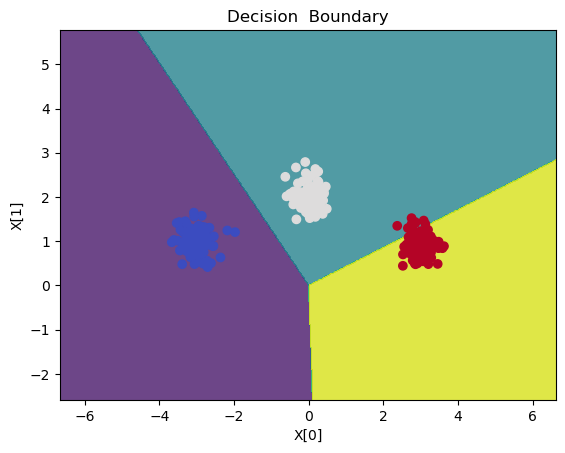

In [12]:
#Here we test the OneVsAllClassifier
from sklearn import svm
svm_estimator = svm.LinearSVC(loss='hinge', fit_intercept=False, C=200)
clf_onevsall = OneVsAllClassifier(svm_estimator, n_classes=3)
clf_onevsall.fit(X,y)

for i in range(3) :
    print("Coeffs %d"%i)
    print(clf_onevsall.estimators[i].coef_) #Will fail if you haven't implemented fit yet

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.title("Decision  Boundary")

from sklearn import metrics
metrics.confusion_matrix(y, clf_onevsall.predict(X))

# Multiclass SVM

In [13]:
class_combinations=list(itertools.permutations([0,1,2], 2))
target_comboination=class_combinations[0]
psi= lambda target_combination, y: np.array([y_i in target_comboination for y_i in y])
psi_x_y=np.zeros((len(y), 6))
i=0
for target_combination in itertools.permutations(set(y), 2):
    psi_x_y[:,i]=psi(target_combination, y)
    i=i+1
psi_x_y.shape

(300, 6)

In [90]:
psi_x=featureMap(X[0],0,3)
psi_x.shape
w=np.ones((6))
y_true=0
# y_prime=range(3)
check_objective= lambda y_prime: zeroOne(y_true, y_prime) +  featureMap(X[0], y_prime,num_classes=3)@w - featureMap(X[0], y_true,num_classes=3)@w
a=list(map(check_objective, range(3)))
np.argmax(a)


1

In [151]:
def zeroOne(y,a) :
    '''
    Computes the zero-one loss.
    @param y: output class
    @param a: predicted class
    @return 1 if different, 0 if same
    '''
    return int(y != a)

def featureMap(X,y,num_classes) :
    '''
    Computes the class-sensitive features.
    @param X: array-like, shape = [n_samples,n_inFeatures] or [n_inFeatures,], input features for input data
    @param y: a target class (in range 0,..,num_classes-1)
    @return array-like, shape = [n_samples,n_outFeatures], the class sensitive features for class y
    '''
    #The following line handles X being a 1d-array or a 2d-array
    num_samples, num_inFeatures = (1,X.shape[0]) if len(X.shape) == 1 else (X.shape[0],X.shape[1])
    #your code goes here, and replaces following return
    x_prime=np.zeros((num_samples,num_inFeatures*num_classes))
    x_prime[:,0+(num_classes-1)*y:2+(num_classes-1)*y]=X
    return x_prime
def sgd(X, y, num_outFeatures, subgd, eta = 0.1, T = 10000):
    '''
    Runs subgradient descent, and outputs resulting parameter vector.
    @param X: array-like, shape = [n_samples,n_features], input training data 
    @param y: array-like, shape = [n_samples,], class labels
    @param num_outFeatures: number of class-sensitive features
    @param subgd: function taking x,y,w and giving subgradient of objective
    @param eta: learning rate for SGD
    @param T: maximum number of iterations
    @return: vector of weights
    '''
    alpha=.5
    num_samples = X.shape[0]
    w=np.array([1]*num_outFeatures)
    t=0
    indecies=list(range(num_samples))
    rng=np.random.default_rng()
    while(t<T):
        rng.shuffle(indecies)
        t=t+1
        for i in indecies:
            w=w-eta*subgd(X[i], y[i],w)
        eta=1/(alpha*t)
    return w

class MulticlassSVM(BaseEstimator, ClassifierMixin):
    '''
    Implements a Multiclass SVM estimator.
    '''
    def __init__(self, num_outFeatures, lam=1.0, num_classes=3, Delta=zeroOne, Psi=featureMap):       
        '''
        Creates a MulticlassSVM estimator.
        @param num_outFeatures: number of class-sensitive features produced by Psi
        @param lam: l2 regularization parameter
        @param num_classes: number of classes (assumed numbered 0,..,num_classes-1)
        @param Delta: class-sensitive loss function taking two arguments (i.e., target margin)
        @param Psi: class-sensitive feature map taking two arguments
        '''
        self.num_outFeatures = num_outFeatures
        self.lam = lam
        self.num_classes = num_classes
        self.Delta = Delta
        self.Psi = lambda X,y : Psi(X,y,num_classes)
        self.fitted = False
    
    def subgradient(self,x,y,w):
        '''
        Computes the subgradient at a given data point x,y
        @param x: sample input
        @param y: sample class
        @param w: parameter vector
        @return returns subgradient vector at given x,y,w
        '''
        #Your code goes here and replaces the following return statement
        regularization_term=2*self.lam*w
        check_objective= lambda y_prime: zeroOne(y, y_prime) +  self.Psi(x, y_prime)@w.T - self.Psi(x, y)@w.T
        a=list(map(check_objective, range(self.num_classes)))
        y_pred=np.argmax(a)
        out=np.max(a)
        if out!=0:
            return regularization_term+self.Psi(x, y_pred) - self.Psi(x, y)
        else:
            return regularization_term
        
    def fit(self,X,y,eta=0.1,T=10000):
        '''
        Fits multiclass SVM
        @param X: array-like, shape = [num_samples,num_inFeatures], input data
        @param y: array-like, shape = [num_samples,], input classes
        @param eta: learning rate for SGD
        @param T: maximum number of iterations
        @return returns self
        '''
        self.coef_ = sgd(X,y,self.num_outFeatures,self.subgradient,eta,T)
        self.fitted = True
        return self
    
    def decision_function(self, X):
        '''
        Returns the score on each input for each class. Assumes
        that fit has been called.
        @param X : array-like, shape = [n_samples, n_inFeatures]
        @return array-like, shape = [n_samples, n_classes] giving scores for each sample,class pairing
        '''
        if not self.fitted:
            raise RuntimeError("You must train classifer before predicting data.")
        #Your code goes here and replaces following return statement
        descions=np.zeros([X.shape[0],self.num_classes])
        for i in range(self.num_classes):
            descions[:,i]=self.coef_@self.Psi(X,i).T
        return descions


        return 0
            
    def predict(self, X):
        '''
        Predict the class with the highest score.
        @param X: array-like, shape = [n_samples, n_inFeatures], input data to predict
        @return array-like, shape = [n_samples,], class labels predicted for each data point
        '''

        #Your code goes here and replaces following return statement
        classifier_estimates=self.decision_function(X)
        print(classifier_estimates.shape)
        return np.argmax(classifier_estimates, axis=1)

w:
[[-0.34923032 -0.03734667 -0.00235832  0.08013854  0.35158864 -0.04279187]]
(278635, 3)
(300, 3)


array([[100,   0,   0],
       [  0, 100,   0],
       [  0,   0, 100]])

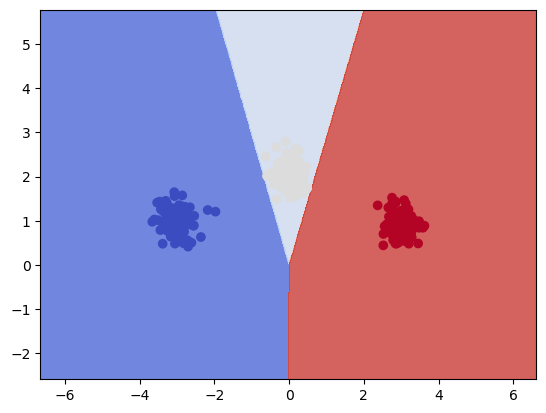

In [154]:
#the following code tests the MulticlassSVM and sgd
#will fail if MulticlassSVM is not implemented yet
est = MulticlassSVM(6,lam=1)
est.fit(X,y,eta=0.1, T=4999)
print("w:")
print(est.coef_)
Z = est.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)


from sklearn import metrics
metrics.confusion_matrix(y, est.predict(X))